# Dataset Information

Dataset yang kita dapat ada 2, yaitu dataset mengenai bangunan dan sensor. Tujuan penelitian ini adalah melihat kontribusi penggunaan energi terbarukan terhadap kualitas udara dalam suatu wilayah dan kontribusi nya. Target Y adalah:
*   AQI Index

# Explore Dataset

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from hyperopt import fmin, tpe, hp, Trials
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Lasso

In [ ]:
data_environment = pd.read_csv('environmental_dataset.csv')

data_environment.head()

,SensorID,SensorLocation,Pollutant_PM2.5_µg/m³,Pollutant_PM10_µg/m³,Pollutant_O3_ppb,Pollutant_NO2_ppb,Pollutant_CO_ppm,Pollutant_SO2_ppb,UrbanVegetationArea_m2,Humidity_%,...,EnergySavingTechnology,AnnualEnergySavings_%,PopulationDensity_people/km²,RetrofitData,RenewableEnergyPercentage_%,AnnualEnergyConsumption_kWh,GreenSpaceIndex_%,HistoricPollutantLevels,Country,AQI_Index
0,S000001,Industrial Area,71.990,101.550,183.240,65.92,30.81,33.040,750.58,42.68,...,Solar Panels,5.22,1912.59,Yes,1.16,47054.58,30.69,164.21,Kyrgyzstan,87.92
1,S000002,Industrial Area,69.960,16.710,40.990,123.30,4.12,26.440,982.93,62.27,...,NaN,31.74,1144.57,Yes,44.40,20672.65,5.96,180.58,Yemen,51.54
2,S000003,Rural,78.135,100.404,30.016,55.27,23.65,6.564,8780.38,78.95,...,Efficient HVAC,15.66,NaN,Yes,21.35,49459.50,48.10,290.00,Kyrgyzstan,64.06
3,S000004,Industrial Area,79.640,128.900,29.500,130.68,9.10,28.580,NaN,36.55,...,LED Lighting,29.32,1832.64,Yes,15.75,5953.21,15.77,241.86,Cambodia,77.47
4,S000005,Industrial Area,63.350,296.260,76.560,52.04,29.87,44.110,917.23,41.13,...,Smart Thermostats,16.29,1624.23,Yes,13.81,16232.45,57.01,90.68,Thailand,106.47


In [ ]:
data_building = pd.read_csv('building_dataset.csv')

data_building.head()

,BuildingID,BuildingType,YearBuilt,MonthlyElectricityConsumption_kWh,PeakUsageTime_Hour,RenewableCapacity_kWh,RenewableType,RenewableContributionPercentage,EnergySource,EnergyEfficiency_kWh_per_m2,WeatherData_Temperature_C,WeatherData_SolarIntensity_Hours,WeatherData_WindSpeed_km_h
0,B000001,Educational,NaN,673.62,8,3292.66,NaN,30.27,Electricity,21.15,12.51,5.44,71.64
1,B000002,Agricultural,NaN,294.60,10,0.00,Tidal,0.00,Coal,21.01,18.22,8.91,10.85
2,B000003,Retail,2020.0,210.20,20,6483.89,Solar,90.72,Electricity,34.53,39.40,3.59,13.45
3,B000004,Commercial,NaN,174.14,5,12150.11,Wind,45.16,Biomass,48.66,17.97,3.65,40.85
4,B000005,Educational,NaN,61.27,23,3516.48,Solar,96.59,Electricity,25.46,16.18,8.11,72.20


In [ ]:
data_environment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9858 entries, 0 to 9857
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SensorID                      9858 non-null   object 
 1   SensorLocation                9858 non-null   object 
 2   Pollutant_PM2.5_µg/m³         9858 non-null   float64
 3   Pollutant_PM10_µg/m³          9858 non-null   float64
 4   Pollutant_O3_ppb              9858 non-null   float64
 5   Pollutant_NO2_ppb             9858 non-null   float64
 6   Pollutant_CO_ppm              9858 non-null   float64
 7   Pollutant_SO2_ppb             9858 non-null   float64
 8   UrbanVegetationArea_m2        7337 non-null   float64
 9   Humidity_%                    9858 non-null   float64
 10  AirTemperature_C              9858 non-null   float64
 11  EnergySavingTechnology        8764 non-null   object 
 12  AnnualEnergySavings_%         9858 non-null   float64
 13  Pop

In [ ]:
data_environment.isnull().sum()

,0
SensorID,0
SensorLocation,0
Pollutant_PM2.5_µg/m³,0
Pollutant_PM10_µg/m³,0
Pollutant_O3_ppb,0
Pollutant_NO2_ppb,0
Pollutant_CO_ppm,0
Pollutant_SO2_ppb,0
UrbanVegetationArea_m2,2521
Humidity_%,0


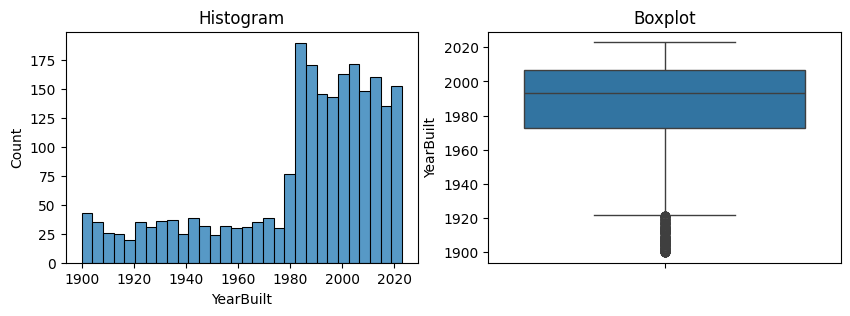

Skewness: -1.108623330689411
Kurtosis: 0.27607932130615875


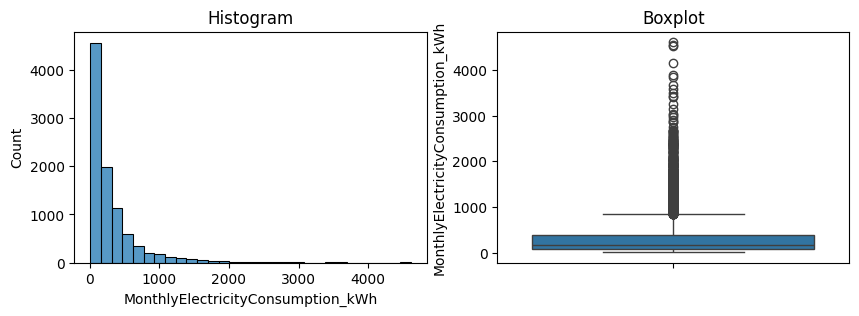

Skewness: 3.284174819999774
Kurtosis: 16.157828539822408


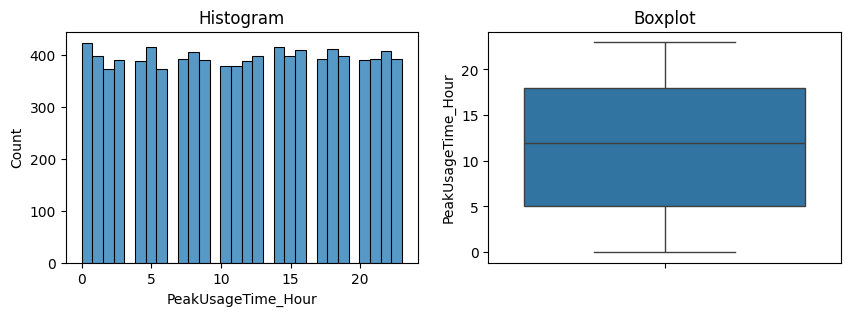

Skewness: -0.014024844806162815
Kurtosis: -1.206166657814197


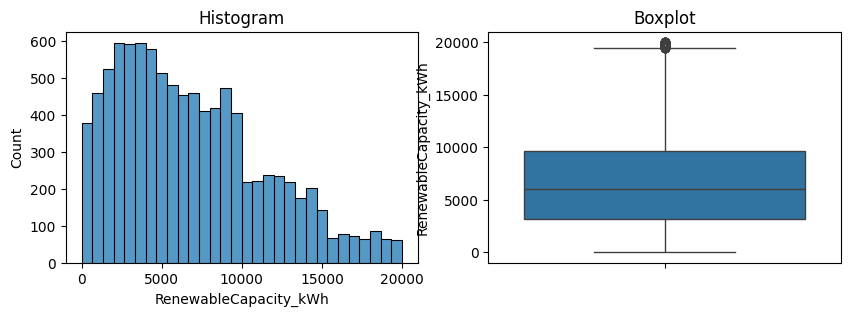

Skewness: 0.6844868834651106
Kurtosis: -0.21016907381197258


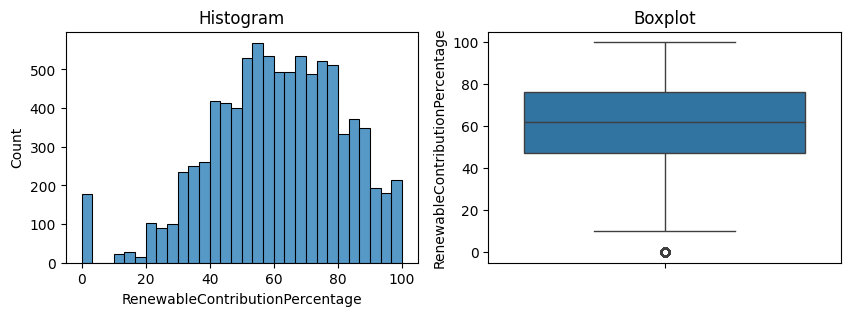

Skewness: -0.46754269100385043
Kurtosis: 0.16394168267234788


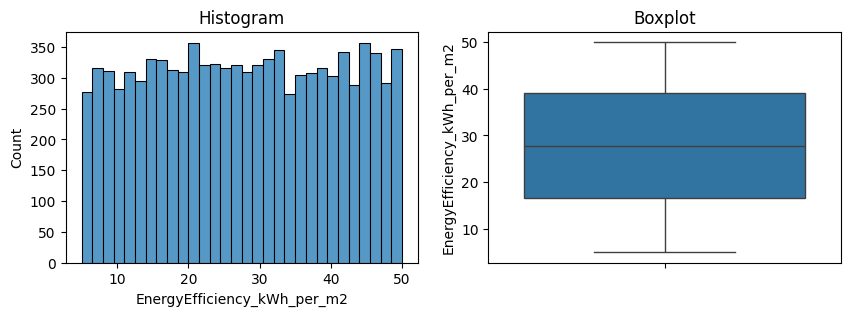

Skewness: -0.002375023247694849
Kurtosis: -1.1918323525257328


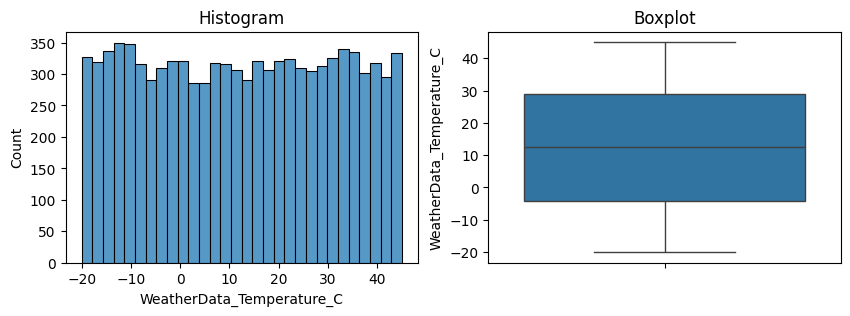

Skewness: -0.0012821168768731937
Kurtosis: -1.2273682739490337


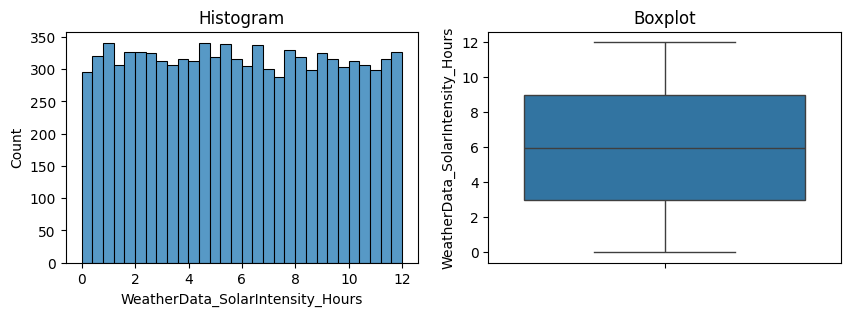

Skewness: 0.018868758867724246
Kurtosis: -1.1963141406360158


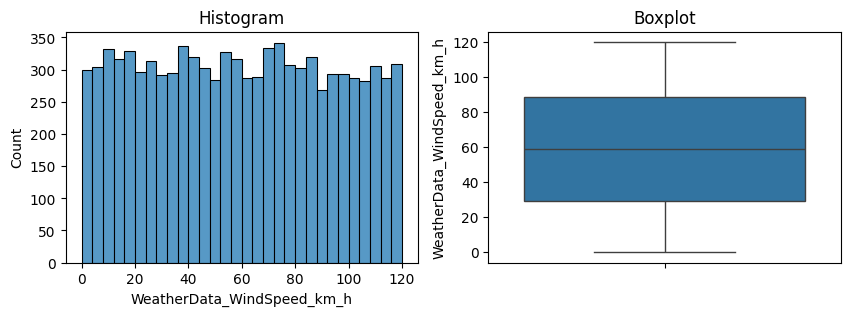

Skewness: 0.023752982468674532
Kurtosis: -1.1843025846938284


In [ ]:
# check data distribution for numeric columns
numeric_columns_env = data_environment.select_dtypes(include=['number']).columns
numeric_columns_bldg = data_building.select_dtypes(include=['number']).columns

def check_distribution_outliers(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30)
        plt.title('Histogram')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[col].skew())
        print('Kurtosis:', df[col].kurt())


check_distribution_outliers(data_building, numeric_columns_bldg)

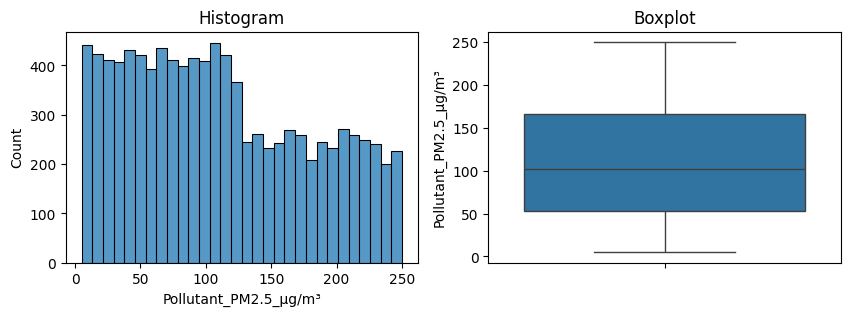

Skewness: 0.33937462193888407
Kurtosis: -1.0072373245745774


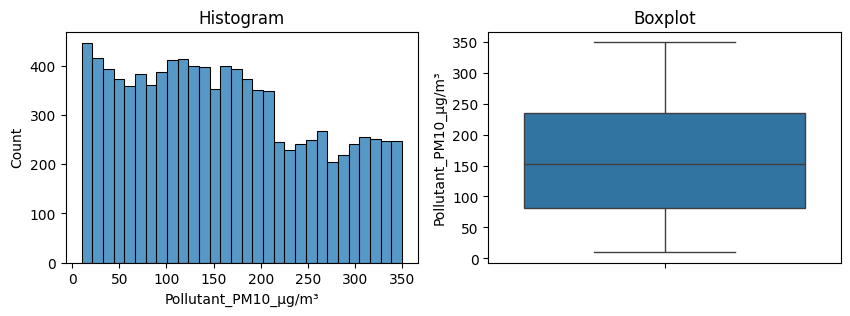

Skewness: 0.2691647358498441
Kurtosis: -1.0075073706862805


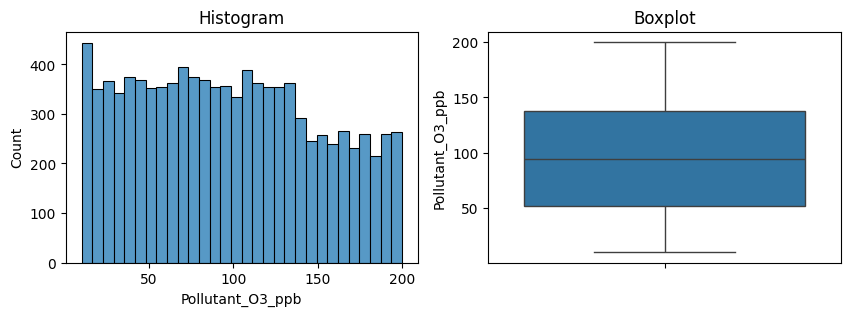

Skewness: 0.16894400532735818
Kurtosis: -1.0565219253770723


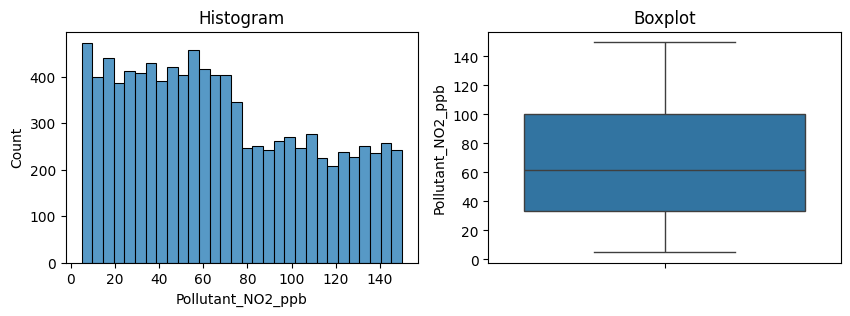

Skewness: 0.34143093318977785
Kurtosis: -1.0052092965842834


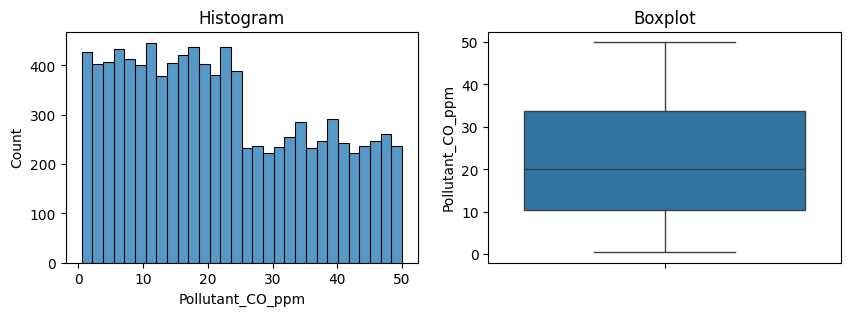

Skewness: 0.32880642238511293
Kurtosis: -1.034900712523191


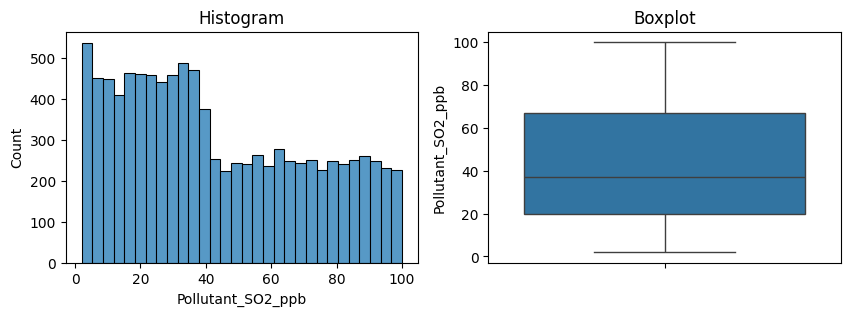

Skewness: 0.390738394908337
Kurtosis: -1.0618884245411735


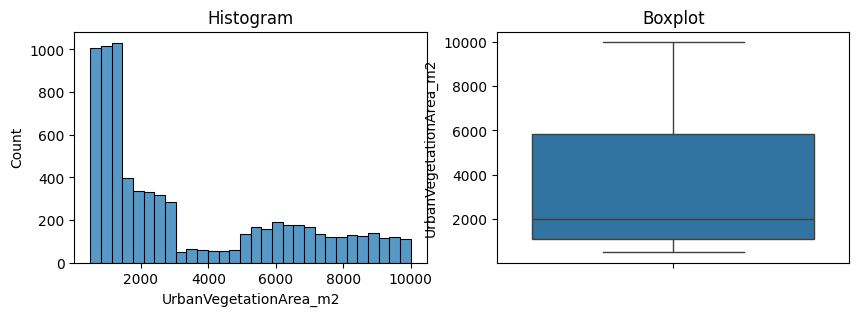

Skewness: 0.864650799363873
Kurtosis: -0.7123696808189219


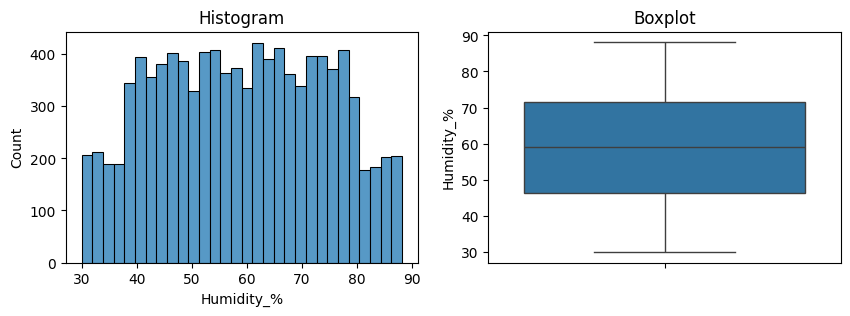

Skewness: -0.000713225502921604
Kurtosis: -1.0388813823571201


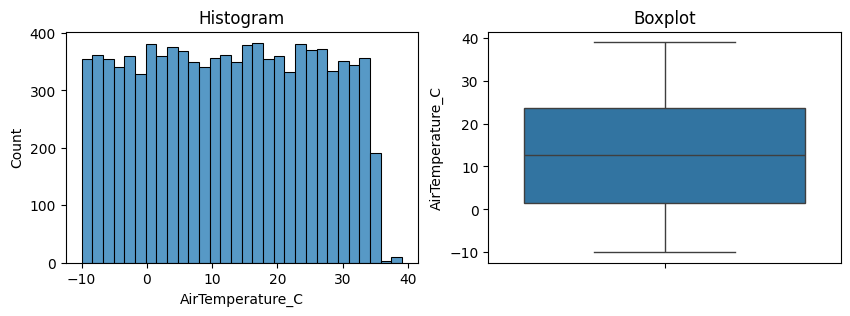

Skewness: -0.0020418649345691855
Kurtosis: -1.1841505168477489


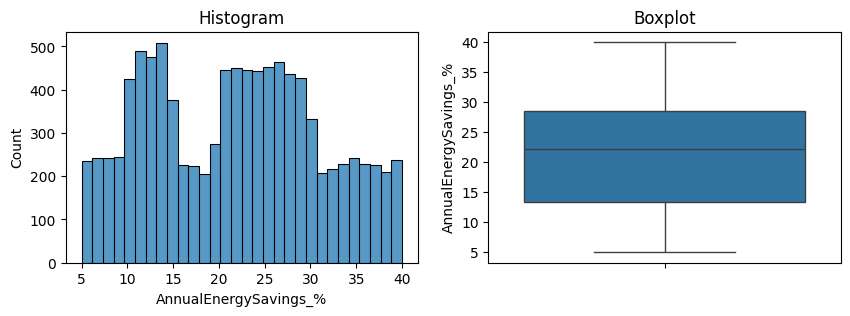

Skewness: 0.09017391059366996
Kurtosis: -1.0124681485050608


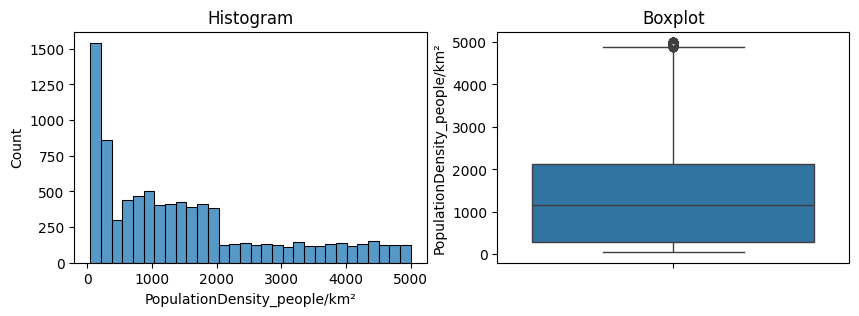

Skewness: 0.9500651115346317
Kurtosis: -0.15260732704687863


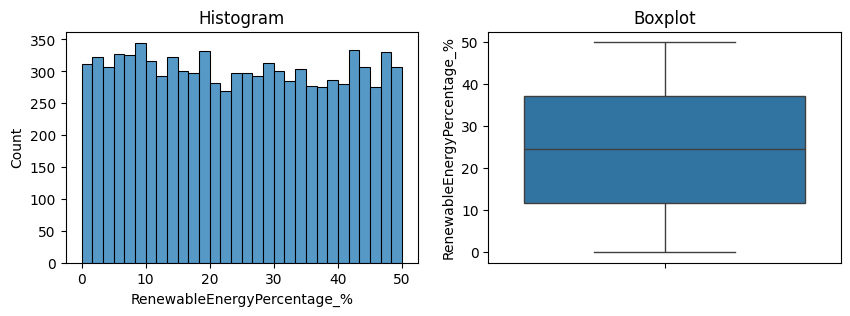

Skewness: 0.0423292619778142
Kurtosis: -1.2221458225254431


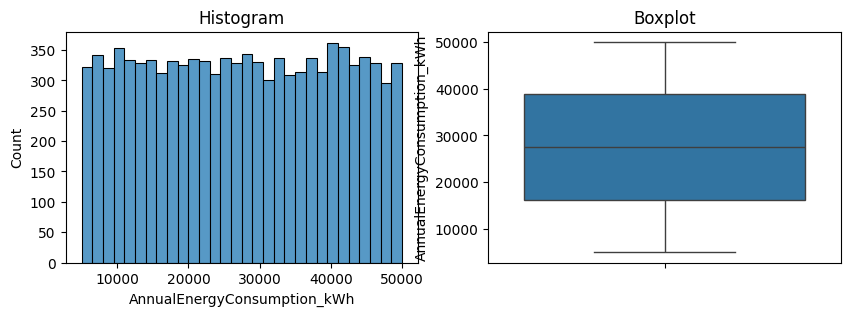

Skewness: -0.0019715655351566956
Kurtosis: -1.2094252763678661


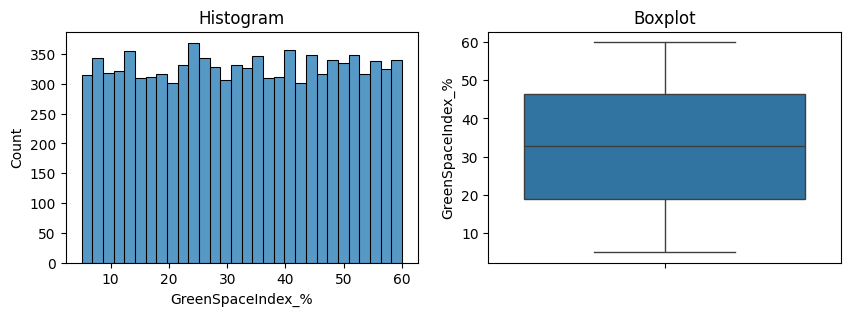

Skewness: -0.009953240578088456
Kurtosis: -1.1981746014120551


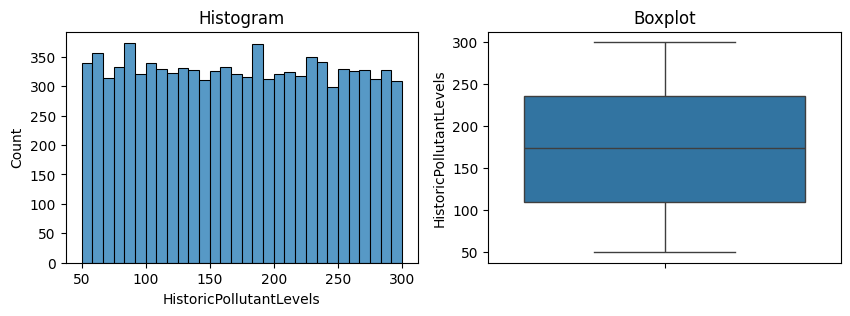

Skewness: 0.01471504465730713
Kurtosis: -1.2045932467763778


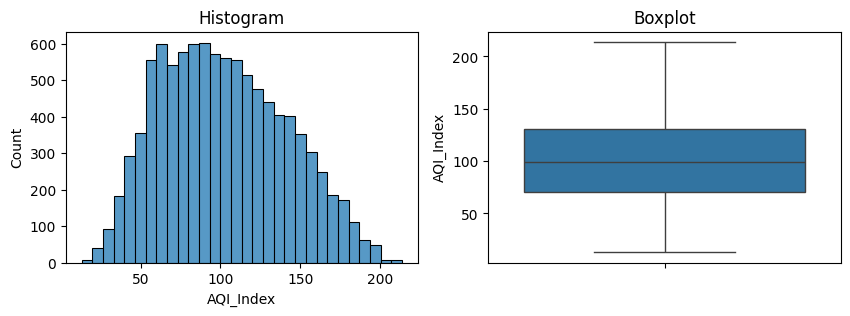

Skewness: 0.2663738963177081
Kurtosis: -0.7041012528770221


In [ ]:
check_distribution_outliers(data_environment, numeric_columns_env)

Every columns doesn't have an extreme skew / outliers, so just used standard scaler later

# EDA

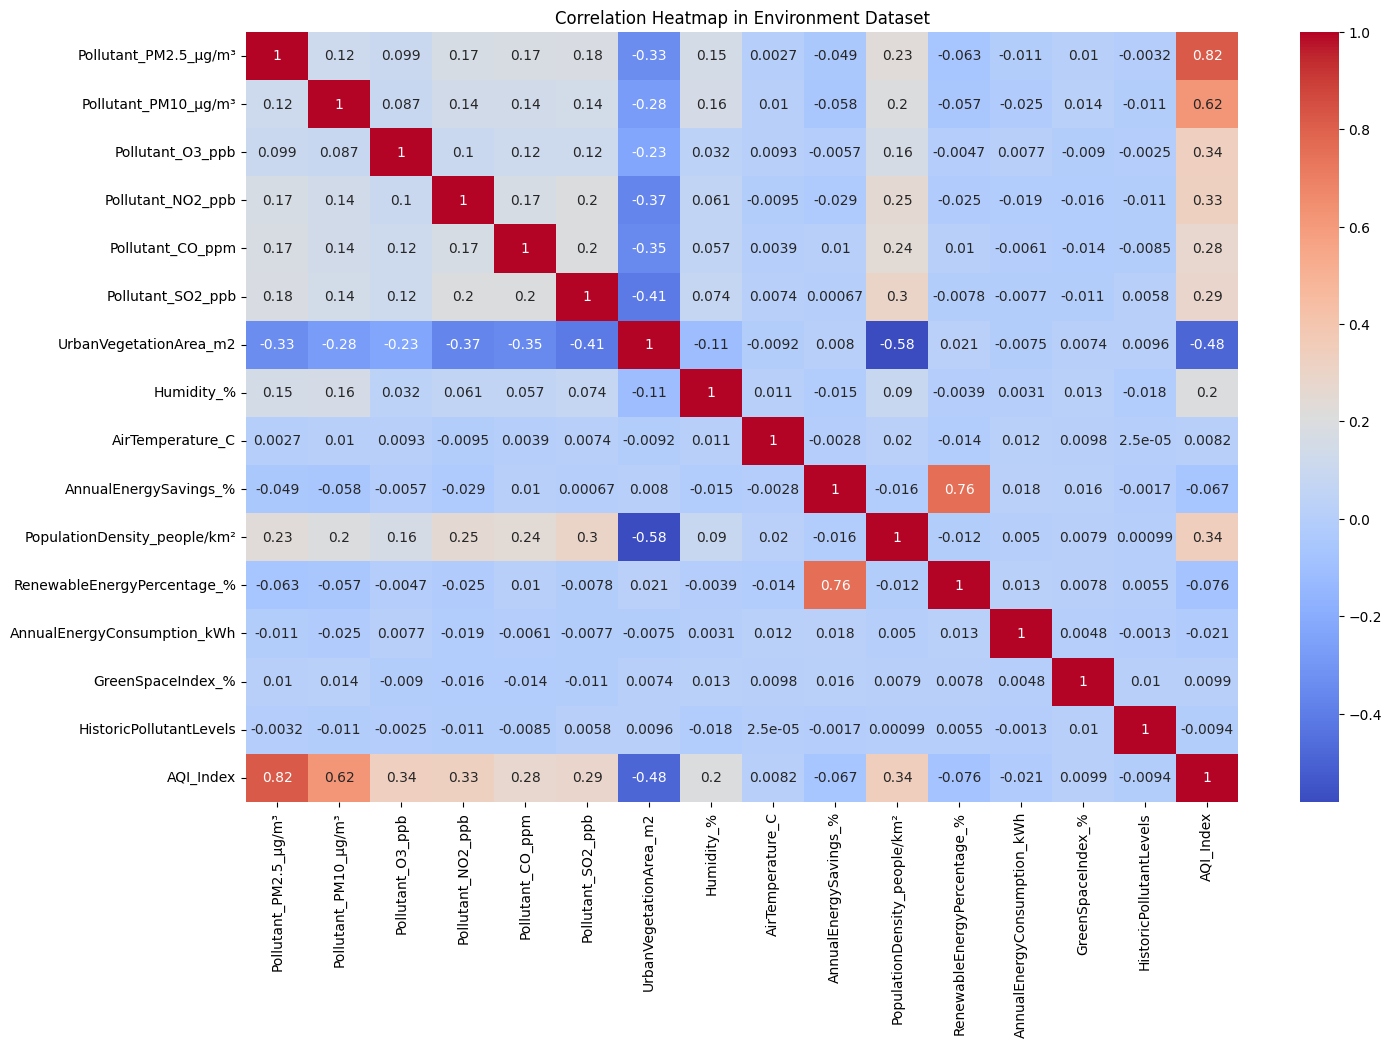

In [ ]:
# correlation heatmap in environment dataset
corr_matrix_env=data_environment.select_dtypes(include=['number']).corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix_env, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap in Environment Dataset')
plt.show()

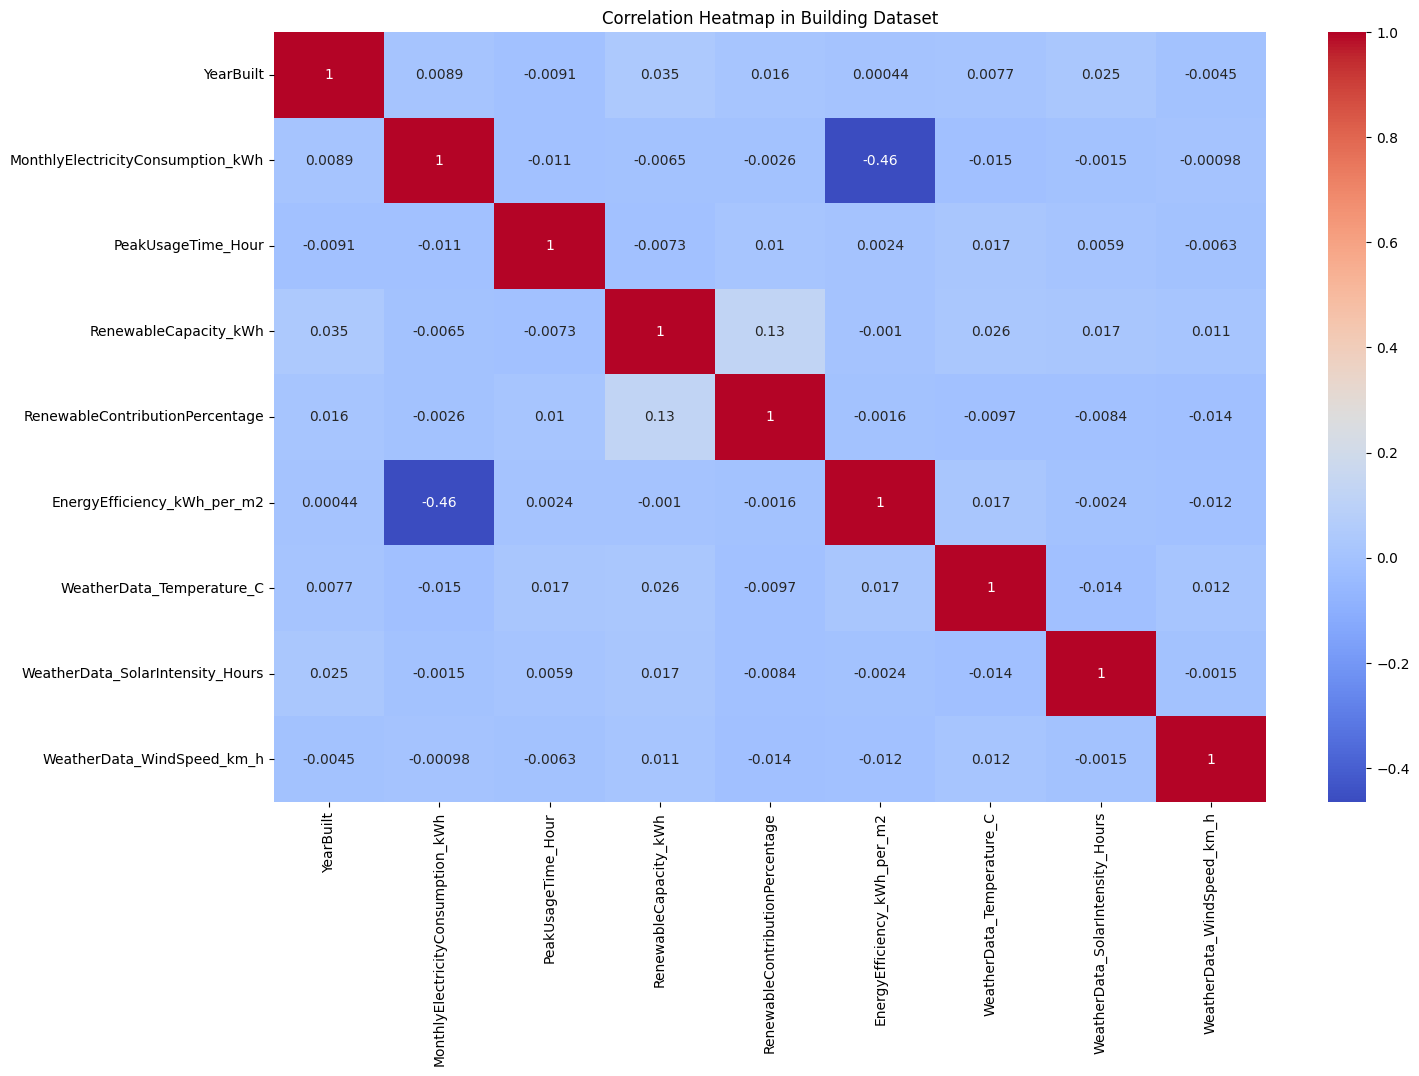

In [ ]:
# correlation heatmap in building dataset
corr_matrix_building =data_building.select_dtypes(include=['number']).corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix_building, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap in Building Dataset')
plt.show()

<ipython-input-17-dee885f1d537>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sensor_counts.index, y=sensor_counts.values, palette="viridis")


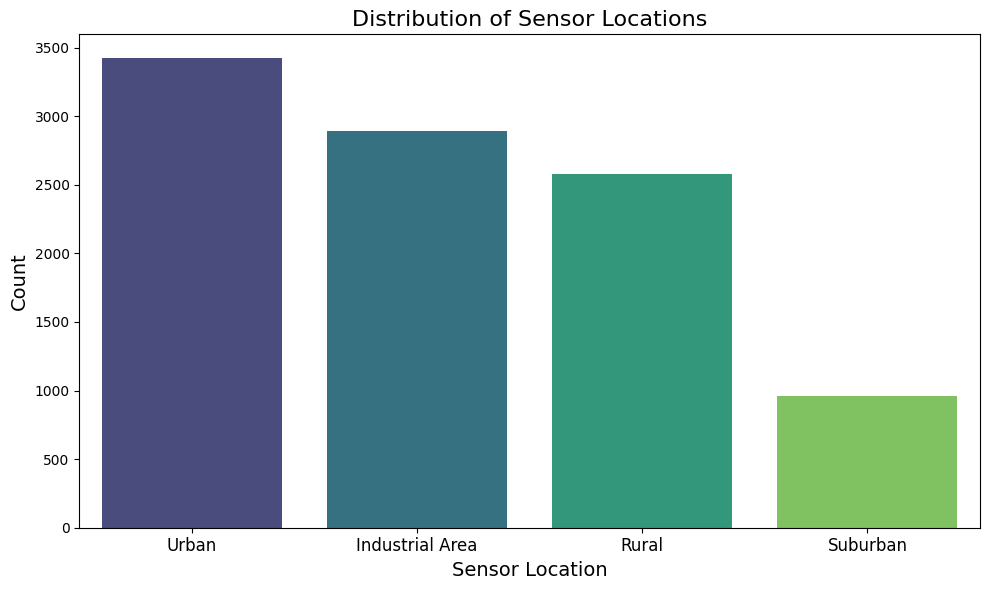

In [ ]:
# bar chart distribution of Sensor Location
sensor_counts = data_environment['SensorLocation'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=sensor_counts.index, y=sensor_counts.values, palette="viridis")

plt.title('Distribution of Sensor Locations', fontsize=16)
plt.xlabel('Sensor Location', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()

plt.show()

<ipython-input-18-4f84f4028c3a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group_by, y=column, data=data, palette=palette)
<ipython-input-18-4f84f4028c3a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group_by, y=column, data=data, palette=palette)
<ipython-input-18-4f84f4028c3a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group_by, y=column, data=data, palette=palette)


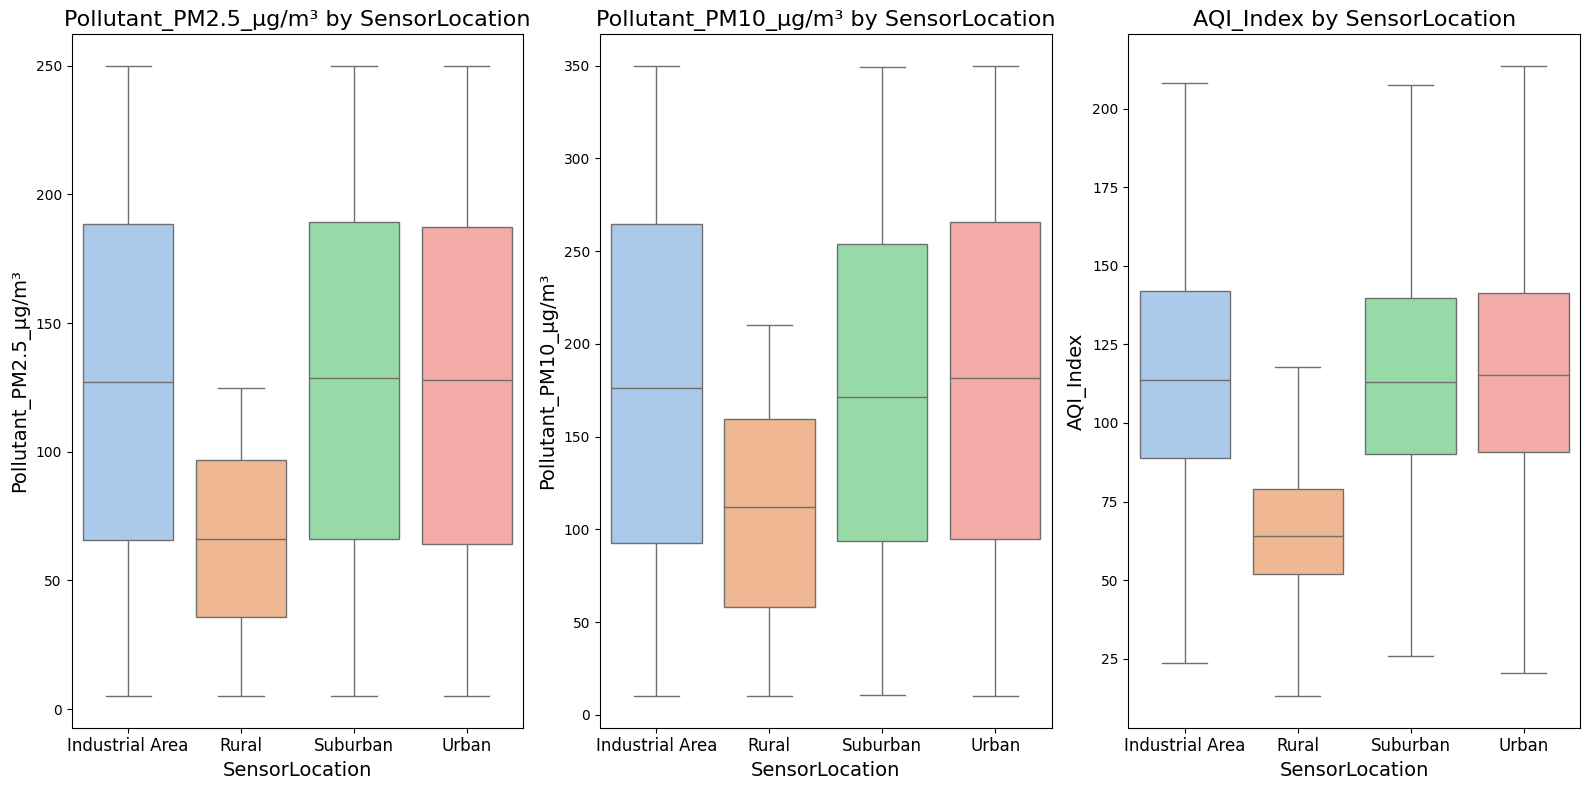

<ipython-input-18-4f84f4028c3a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group_by, y=column, data=data, palette=palette)
<ipython-input-18-4f84f4028c3a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group_by, y=column, data=data, palette=palette)
<ipython-input-18-4f84f4028c3a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group_by, y=column, data=data, palette=palette)


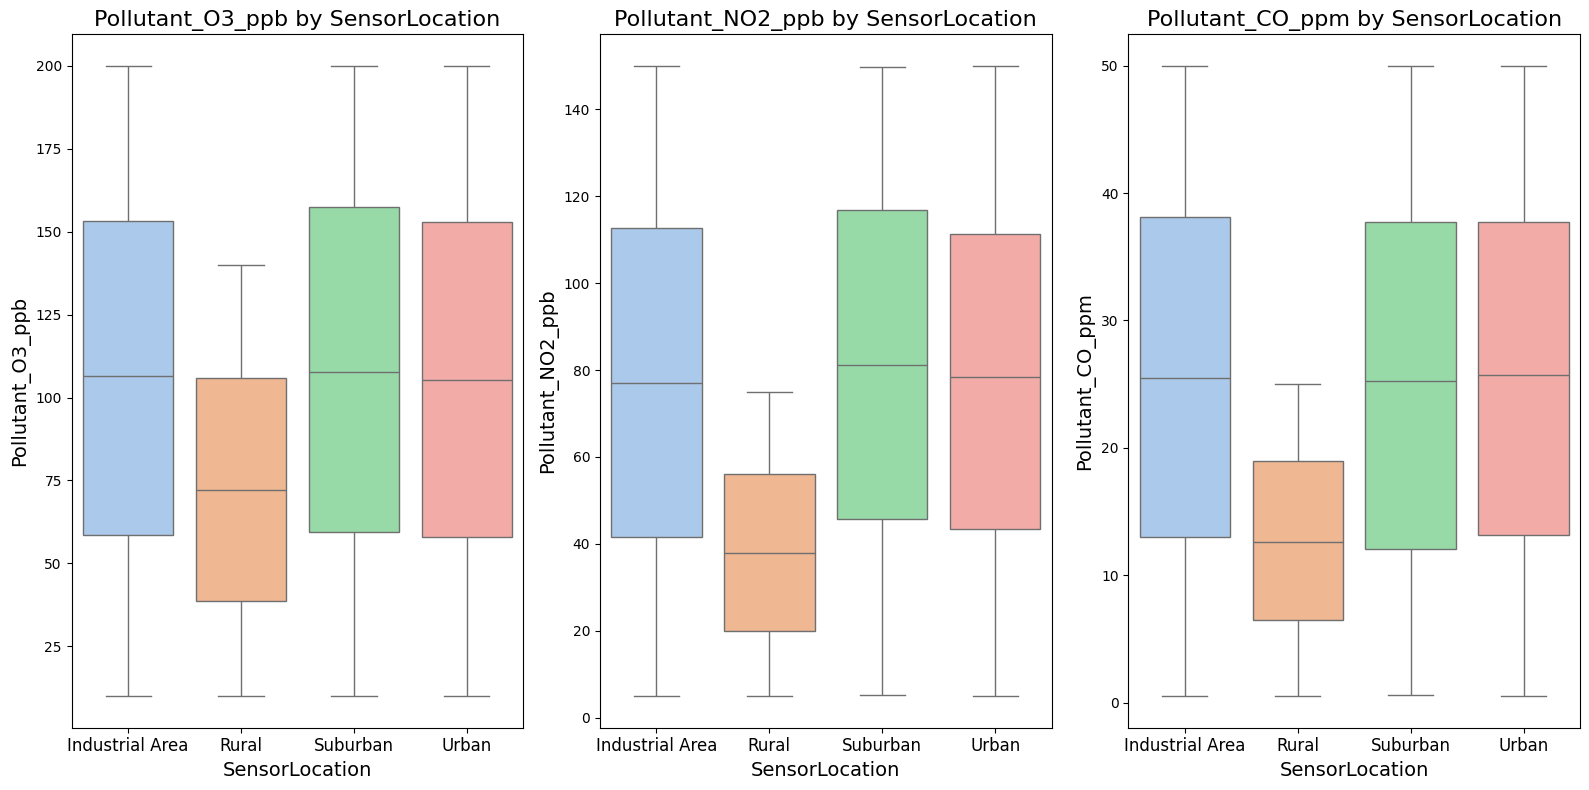

In [ ]:
# pollution distribution based on sensor location
def plot_boxplots(data, columns, group_by, palette="pastel", figsize=(16, 8)):

    num_columns = len(columns)
    plt.figure(figsize=figsize)

    for i, column in enumerate(columns):
        plt.subplot(1, num_columns, i + 1)
        sns.boxplot(x=group_by, y=column, data=data, palette=palette)
        plt.title(f'{column} by {group_by}', fontsize=16)
        plt.xlabel(group_by, fontsize=14)
        plt.ylabel(column, fontsize=14)
        plt.xticks(fontsize=12)

    plt.tight_layout()
    plt.show()

columns_to_plot = ['Pollutant_PM2.5_µg/m³', 'Pollutant_PM10_µg/m³', 'AQI_Index']
plot_boxplots(data=data_environment, columns=columns_to_plot, group_by='SensorLocation')
columns_to_plot = ['Pollutant_O3_ppb', 'Pollutant_NO2_ppb', 'Pollutant_CO_ppm']
plot_boxplots(data=data_environment, columns=columns_to_plot, group_by='SensorLocation')


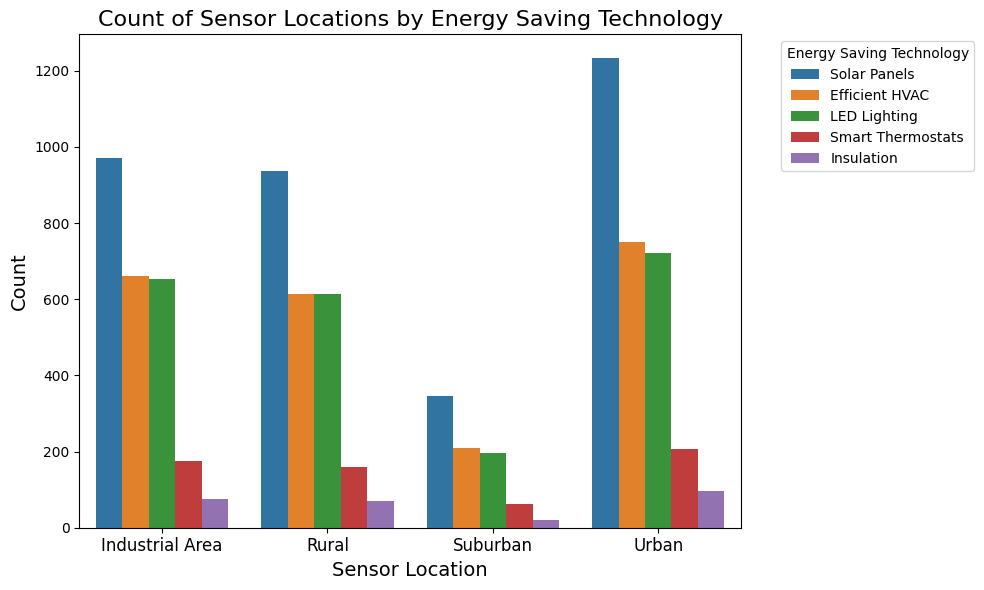

In [ ]:
# Energy Saving Technology Based on SensorLocation
plt.figure(figsize=(10, 6))
sns.countplot(data=data_environment, x='SensorLocation', hue='EnergySavingTechnology')

plt.legend(title='Energy Saving Technology', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Count of Sensor Locations by Energy Saving Technology', fontsize=16)
plt.xlabel('Sensor Location', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

# Pre-Processing

In [ ]:
# drop null value of target col
data_environment.dropna(subset=['RenewableEnergyPercentage_%'], inplace=True)

In [ ]:
# drop urban vegetationArea_m2
data_environment.drop(columns=['UrbanVegetationArea_m2'], inplace=True)

In [ ]:
# fill null values using mode
data_environment['EnergySavingTechnology'].fillna(data_environment['EnergySavingTechnology'].mode()[0], inplace=True)

<ipython-input-22-75fa53bff16d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_environment['EnergySavingTechnology'].fillna(data_environment['EnergySavingTechnology'].mode()[0], inplace=True)


In [ ]:
# Fill null values using median
data_environment['PopulationDensity_people/km²'].fillna(data_environment['PopulationDensity_people/km²'].median(), inplace=True)

<ipython-input-23-ef8c290c68b0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_environment['PopulationDensity_people/km²'].fillna(data_environment['PopulationDensity_people/km²'].median(), inplace=True)


In [ ]:
# drop Sensor ID
data_environment.drop('SensorID', axis=1, inplace=True)

In [ ]:
# encode Retrofit Data
data_environment['RetrofitData'] = data_environment['RetrofitData'].map({'Yes': 1, 'No': 0})

In [ ]:
data_environment.isnull().sum()

,0
SensorLocation,0
Pollutant_PM2.5_µg/m³,0
Pollutant_PM10_µg/m³,0
Pollutant_O3_ppb,0
Pollutant_NO2_ppb,0
Pollutant_CO_ppm,0
Pollutant_SO2_ppb,0
Humidity_%,0
AirTemperature_C,0
EnergySavingTechnology,0


In [ ]:
# encode categorical data using label encoding
le = LabelEncoder()
columns_to_encode = ['SensorLocation', 'EnergySavingTechnology', 'Country']

for column in columns_to_encode:
    data_environment[column] = le.fit_transform(data_environment[column])


In [ ]:
data_environment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9109 entries, 0 to 9857
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SensorLocation                9109 non-null   int64  
 1   Pollutant_PM2.5_µg/m³         9109 non-null   float64
 2   Pollutant_PM10_µg/m³          9109 non-null   float64
 3   Pollutant_O3_ppb              9109 non-null   float64
 4   Pollutant_NO2_ppb             9109 non-null   float64
 5   Pollutant_CO_ppm              9109 non-null   float64
 6   Pollutant_SO2_ppb             9109 non-null   float64
 7   Humidity_%                    9109 non-null   float64
 8   AirTemperature_C              9109 non-null   float64
 9   EnergySavingTechnology        9109 non-null   int64  
 10  AnnualEnergySavings_%         9109 non-null   float64
 11  PopulationDensity_people/km²  9109 non-null   float64
 12  RetrofitData                  9109 non-null   int64  
 13  Renewabl

In [ ]:
# split dependent and independent columns
X = data_environment.drop('AQI_Index', axis=1)
y = data_environment['AQI_Index']

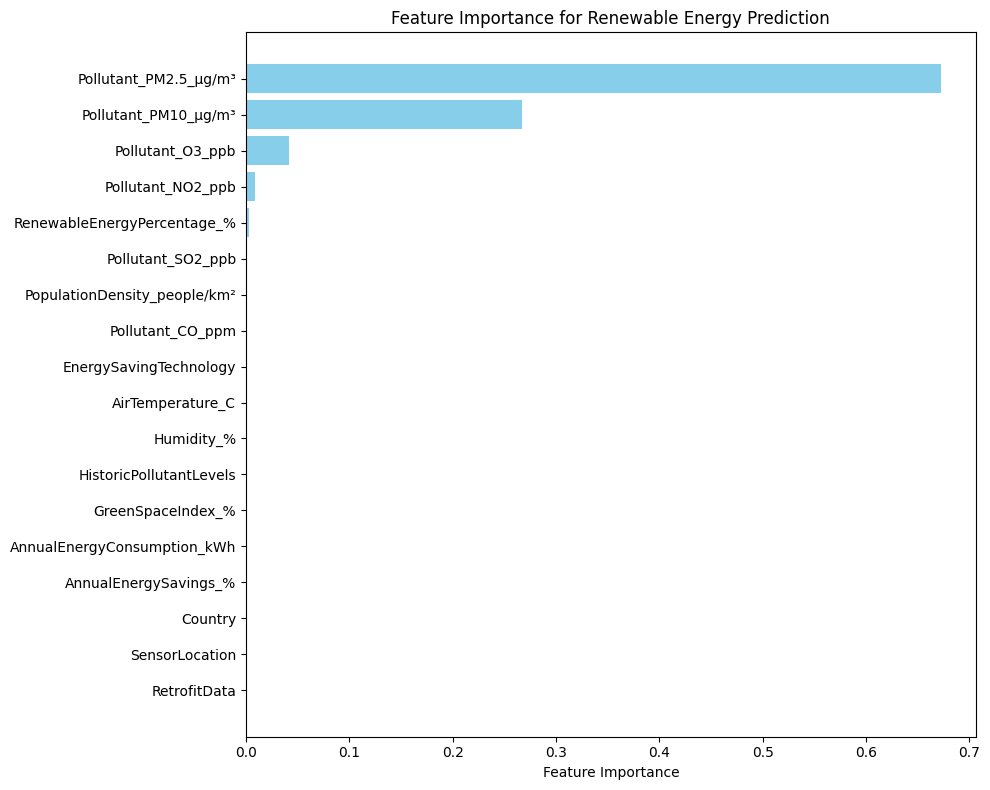

In [ ]:
# check feature importance using Random Forest Regressor
model = RandomForestRegressor().fit(X, y)
importance = model.feature_importances_
features = X.columns
sorted_idx = np.argsort(importance)
sorted_features = features[sorted_idx]
sorted_importance = importance[sorted_idx]

plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importance, color='skyblue')

plt.xlabel('Feature Importance')
plt.title('Feature Importance for Renewable Energy Prediction')
plt.tight_layout()

plt.show()

In [ ]:
# split train vs test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# scale data using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling

## Random Forest

In [ ]:
# using bayesian optimization to find the best params
search_space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 3, 20, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1)
}

def objective(params):
    model = RandomForestRegressor(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        min_samples_split=int(params['min_samples_split']),
        random_state=42
    )
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return -1 * score.mean()

trials = Trials()
best = fmin(fn=objective, space=search_space, algo=tpe.suggest, max_evals=2, trials=trials)
print("Best parameters:", best)

100%|██████████| 2/2 [01:20<00:00, 40.42s/trial, best loss: 14.237438997697492]
Best parameters: {'max_depth': 15.0, 'min_samples_split': 9.0, 'n_estimators': 161.0}


In [ ]:
max_depth = 4
min_samples_split = 10
n_estimators = 194

rf_model = RandomForestRegressor(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    n_estimators=n_estimators,
    random_state=42
)

rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 135.14448721668484
Root Mean Squared Error (RMSE): 135.14448721668484
R^2 Score: 0.909802164422795


## XGBoost

In [ ]:
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    objective='reg:squarederror',
    eval_metric='rmse'
)

In [ ]:
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 4.0397556221199125
Root Mean Squared Error (RMSE): 2.009914332035053
R^2 Score: 0.9973037952129573


## Light GBM

In [ ]:
model_lgm = lgb.LGBMRegressor(
    boosting_type='gbdt',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)

In [ ]:
model_lgm.fit(
    X_train_scaled,
    y_train,
    eval_set=[(X_test_scaled, y_test)],
    eval_metric='rmse'
)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3873
[LightGBM] [Info] Number of data points in the train set: 7886, number of used features: 19
[LightGBM] [Info] Start training from score 102.411037


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMRegressor(random_state=42)

In [ ]:
y_pred = model_lgm.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 3.860790143647748
Root Mean Squared Error (RMSE): 3.860790143647748
R^2 Score: 0.9974063624797843


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## ADABoost

In [ ]:
model_ada=AdaBoostRegressor(
    n_estimators=50,
    learning_rate=1.0,
    loss='square',
    random_state=42)

model_ada.fit(
    X_train_scaled,
    y_train
)

AdaBoostRegressor(loss='square', random_state=42)

In [ ]:
y_pred = model_ada.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 60.07010586560173
Root Mean Squared Error (RMSE): 7.750490685472871
R^2 Score: 0.9599081424365943


## Stacking (Random Forest and XGBoost) with Bayesian Optimization

In [ ]:
# meta model nya Linear Regression
rf = RandomForestRegressor(
    n_estimators=194,
    max_depth=4,
    min_samples_split=10,
    random_state=42
)
xgboost = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    objective='reg:squarederror',
    eval_metric='rmse'
)

stacking_model = StackingRegressor(
    estimators=[
        ('rf', rf),
        ('xgb', xgboost)
    ],
    final_estimator=LinearRegression()
)

stacking_model.fit(X_train_scaled, y_train)

y_pred = stacking_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 3.769823930434291
Root Mean Squared Error (RMSE): 1.9416034431454563
R^2 Score: 0.9974839524272482


In [ ]:
# meta model nya Lasso Regression
rf = RandomForestRegressor(
    n_estimators=194,
    max_depth=4,
    min_samples_split=10,
    random_state=42
)
xgboost = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    objective='reg:squarederror',
    eval_metric='rmse'
)

stacking_model = StackingRegressor(
    estimators=[
        ('rf', rf),
        ('xgb', xgboost)
    ],
    final_estimator=Lasso()
)

stacking_model.fit(X_train_scaled, y_train)

y_pred = stacking_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 3.758673551361367
Root Mean Squared Error (RMSE): 1.938729880968818
R^2 Score: 0.9974913943886553
